# Data cleaning and exploration

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the data

In [2]:
data_path = "data/housing.csv"
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## General exploring

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Preliminar visualizations

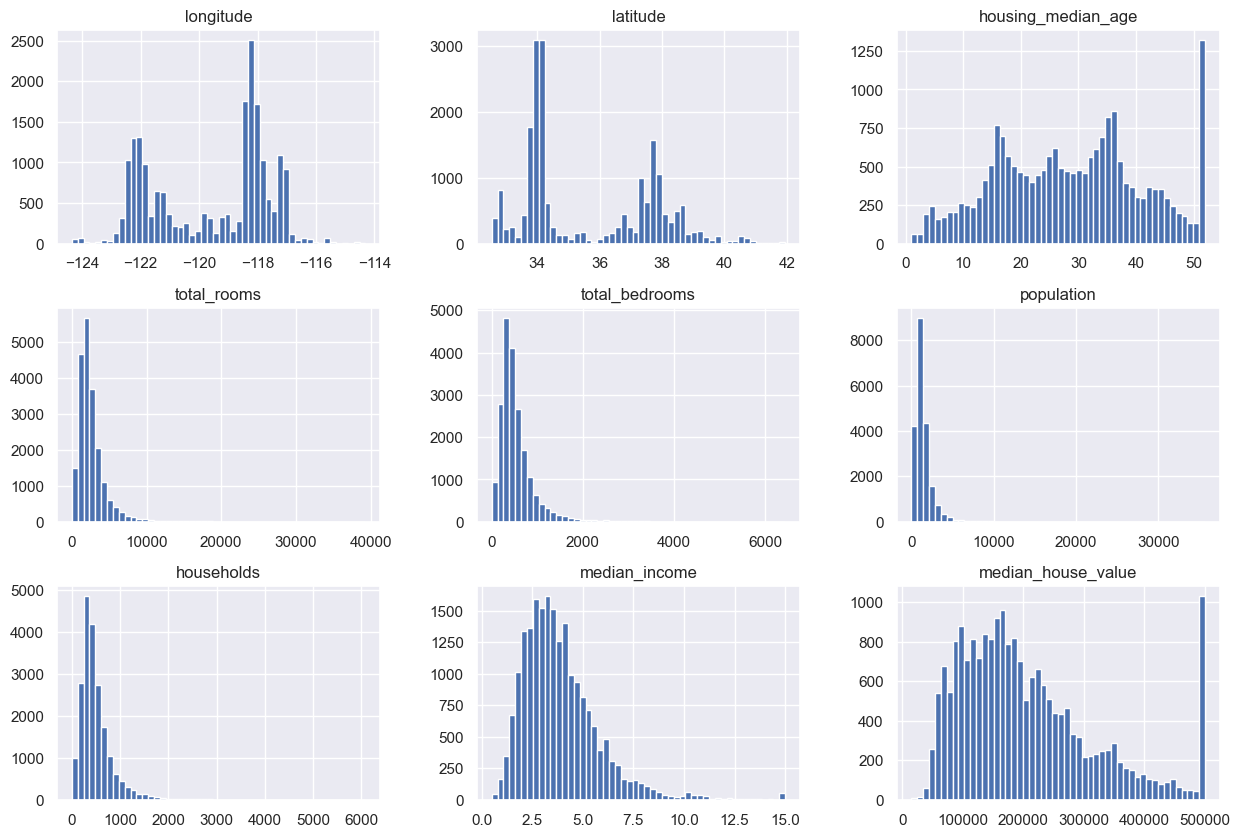

In [44]:
df.hist(bins=50, figsize=(15, 10), edgecolor="white");

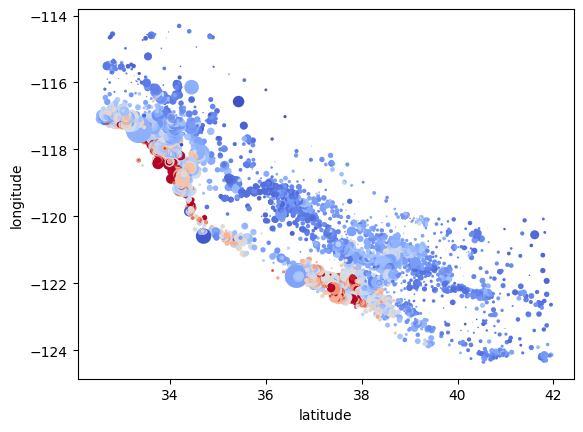

In [6]:
sns.scatterplot(
    x="latitude",
    y="longitude",
    data=df,
    edgecolor="none",
    hue="median_house_value",
    palette="coolwarm",
    s=df["population"] / 100,
    legend=False,
)
plt.show()

## Basic data cleaning

### Remove null value rows

In this step all the rows that contain null values in the `total_bedrooms` will be removed. This decision was taken from the point of view those rows are only 207 of 20,640, representing only the 1% of the total data rows.

In [7]:
dfc = df.dropna(subset=["total_bedrooms"])

In [8]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Convert categoric variables to numeric variables

In the dataset all the columns are numeric except for one, the column 9 `ocean_proximity` is categorical, for a proper analysis it needs to be converted to numeric values.

In [9]:
dfc["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

It is observed it has 5 different values. In the next steps it will converted to numeric values, creating a new value for each column, taking only 1 of 2 possible values, 1 or 0. Those columns will be joined to the main cleaned table and the original categorical column will be removed.

In [10]:
# numeric values for each category - integer values and non boolean values
dummies = pd.get_dummies(dfc["ocean_proximity"], dtype=int, drop_first=False)

In [11]:
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [12]:
# join the new columns to the main cleaned dataframe
dfc = dfc.join(dummies)

In [13]:
dfc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [14]:
# remove original categorical column
dfc = dfc.drop(columns=["ocean_proximity"], axis=1)

In [15]:
dfc.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [16]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  int64  
 10  INLAND              20433 non-null  int64  
 11  ISLAND              20433 non-null  int64  
 12  NEAR BAY            20433 non-null  int64  
 13  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.3 MB


## Looking for Correlations

Generate a correlations table

In [17]:
dfc.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


Create a heatmap for better visualization and understanding. This plot show us the same as the table but with easy color encoding for a quick and easy understanding.

<Axes: >

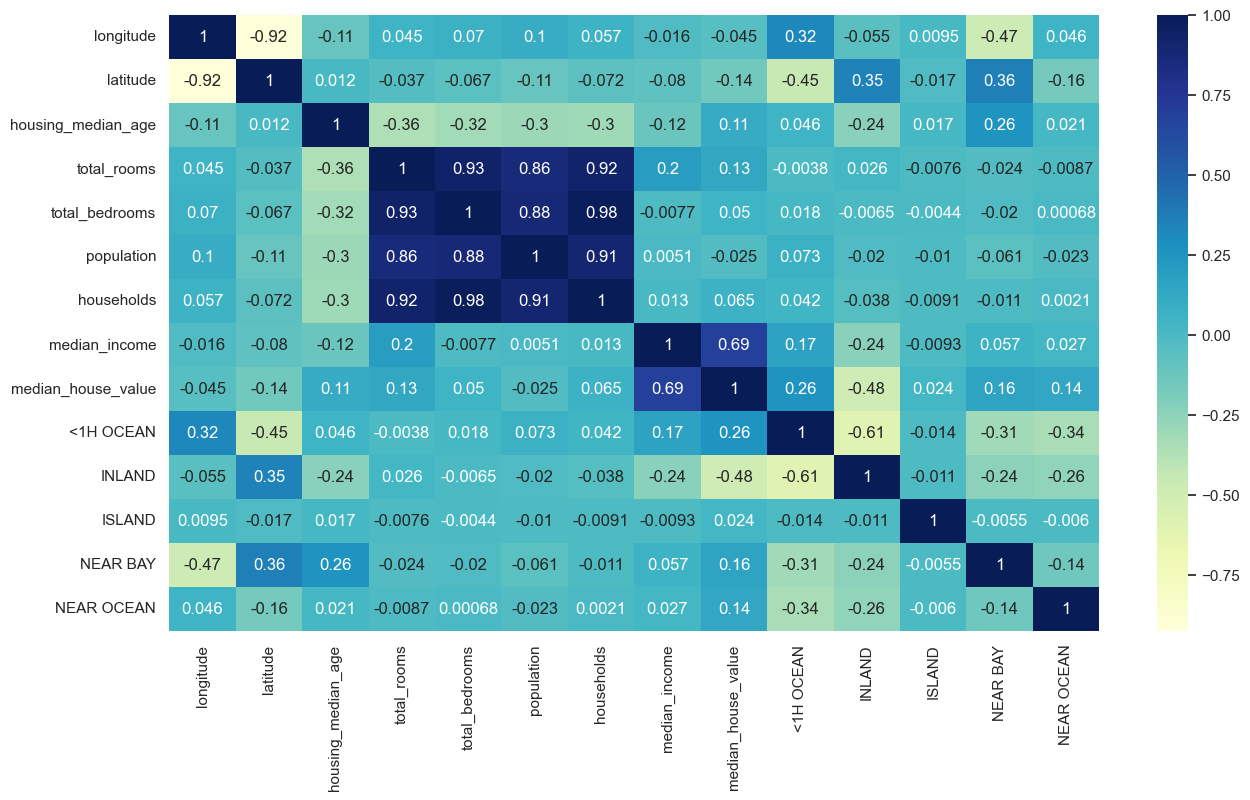

In [18]:
sns.set_theme(rc={"figure.figsize": (15, 8)})
sns.heatmap(dfc.corr(), annot=True, cmap="YlGnBu")

In this heatmap, the darker the color the strongest the correlation. For this analysis we are interested in the prices of the houses, so the main focus will be the variable `median_house_value` and its correlation with the other variables.

Let's sort the correlation values in descending order for each other column correlated the price variable.

In [19]:
housing_price_corrs = dfc.corr()["median_house_value"].sort_values(ascending=False)
housing_price_corrs

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

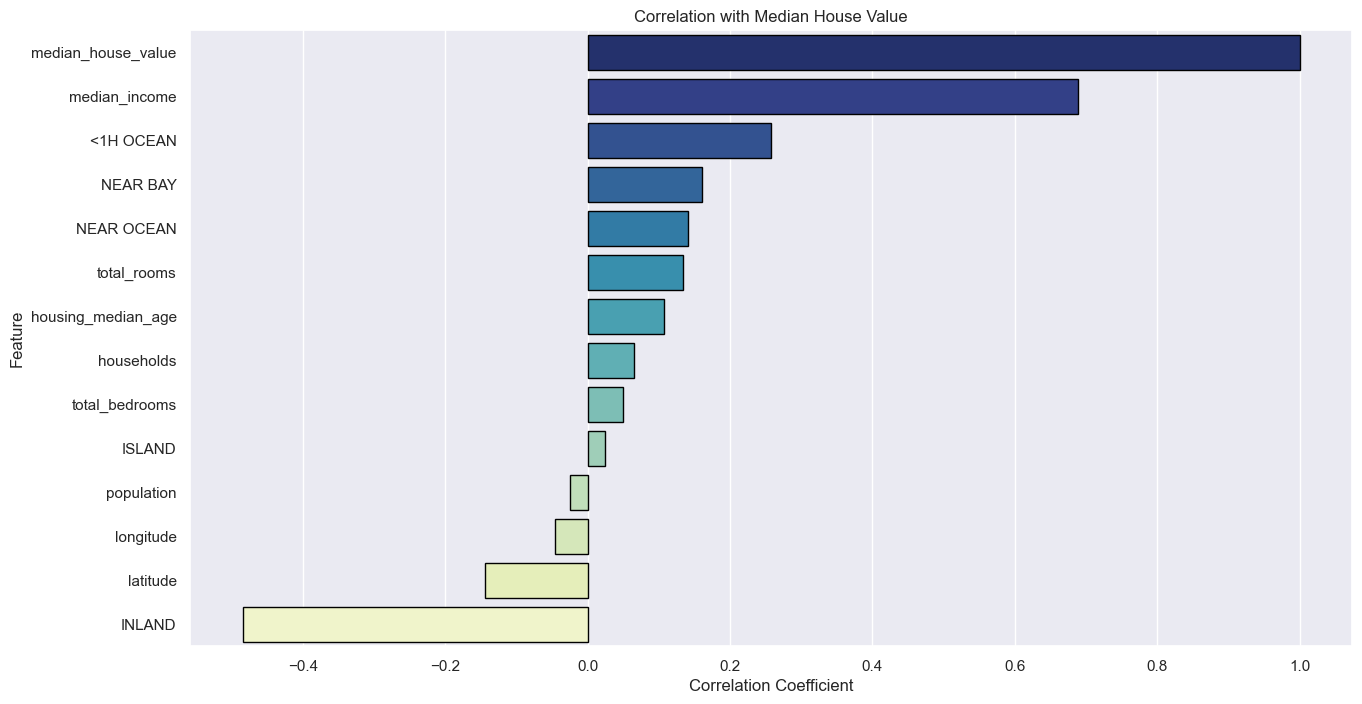

In [20]:
sns.barplot(
    x=housing_price_corrs.values,
    y=housing_price_corrs.index,
    hue=housing_price_corrs.index,
    palette="YlGnBu_r",
    edgecolor="black",
)
plt.title("Correlation with Median House Value")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

# Linear Regression

Lets create a scatter plot of the top 2 features with the largest correlation value related to the `median_house_value`: `median_income` and `total_rooms`. This to visualize better the correlation.

Notice that the orginally categorical features were ignored due to that its values are only 0 or 1, making it hard to visualize in a standard scatter plot.

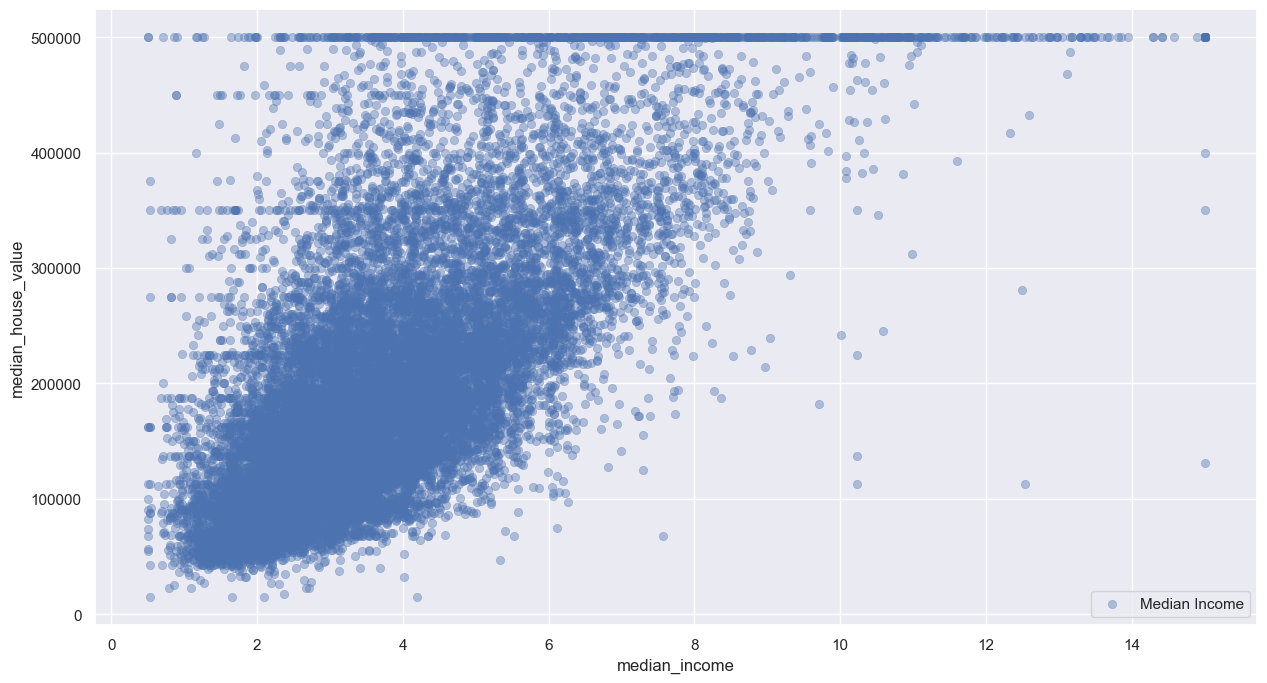

In [21]:
sns.scatterplot(
    x="median_income",
    y="median_house_value",
    data=dfc,
    label="Median Income",
    edgecolor=None,
    alpha=0.4,
)
plt.legend()
plt.show()

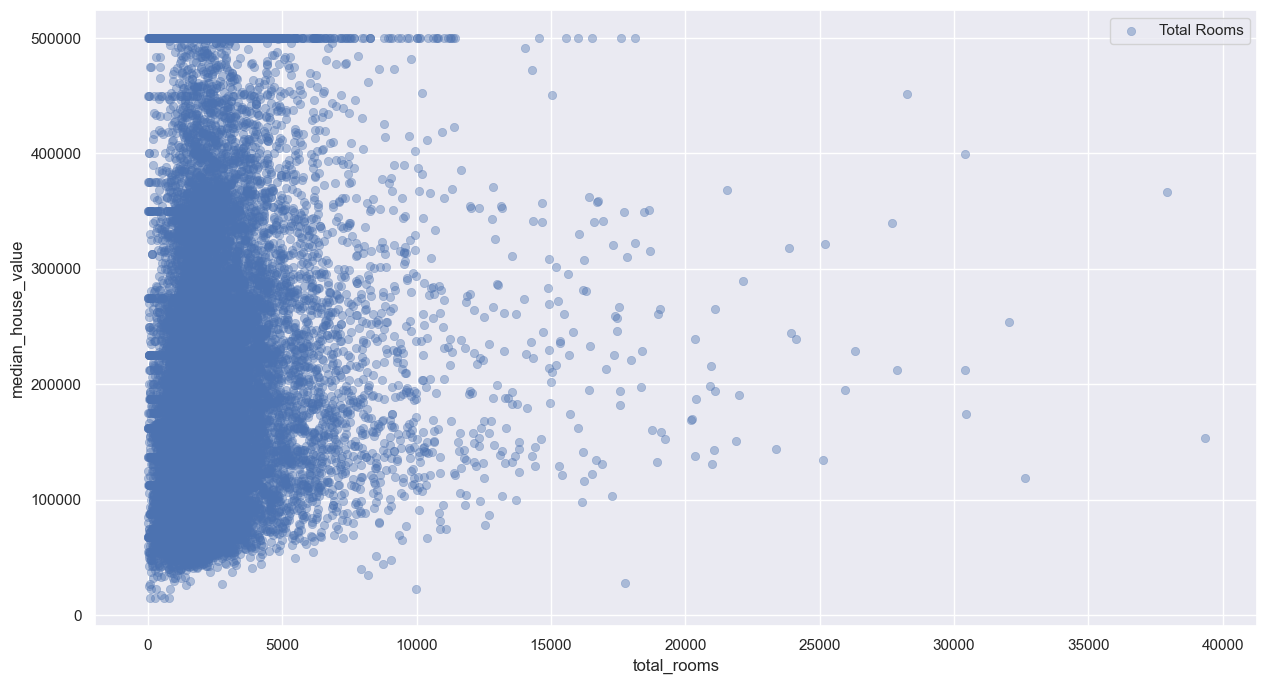

In [22]:
sns.scatterplot(
    x="total_rooms",
    y="median_house_value",
    data=dfc,
    label="Total Rooms",
    edgecolor=None,
    alpha=0.4,
)
plt.legend()
plt.show()

The scorrelation with total rooms seems not too clear, let's create a new feature from the current features and see if we can foind out hidden correlations. Let's find if the ratio of bedrooms to total bedrooms has a better correlation.

In [23]:
dfc["bedroom_ratio"] = dfc["total_bedrooms"] / dfc["total_rooms"]

<Axes: >

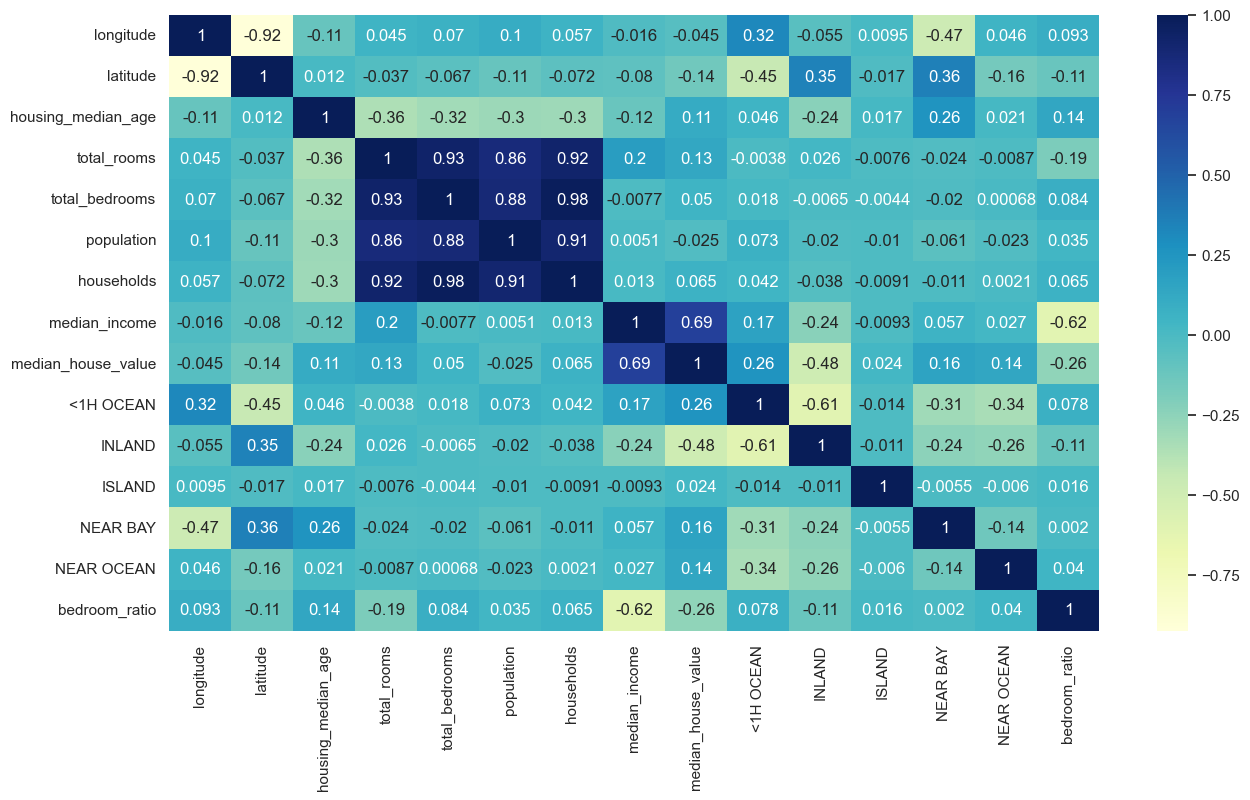

In [24]:
sns.set_theme(rc={"figure.figsize": (15, 8)})
sns.heatmap(dfc.corr(), annot=True, cmap="YlGnBu")

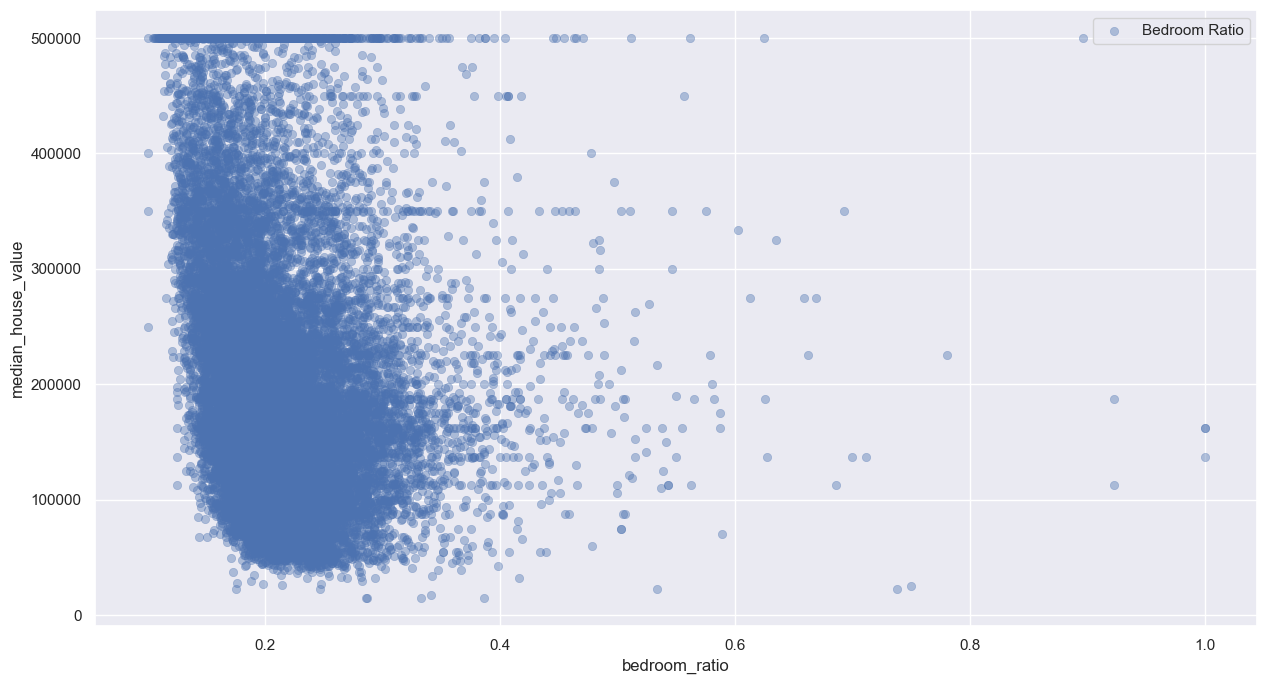

In [25]:
sns.scatterplot(
    x="bedroom_ratio",
    y="median_house_value",
    data=dfc,
    label="Bedroom Ratio",
    edgecolor=None,
    alpha=0.4,
)
plt.legend()
plt.show()

It has a slight clearer correlation. For now let's work with the highest correlated value, the `median_income`.

## Prepare and train

### Separate the training data from the target data

In [26]:
# Get all features except the target
X = dfc.drop(columns=["median_house_value"], axis=1)
# Target variable
Y = dfc["median_house_value"].copy()

### Split the data into Training and Test data

In [28]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)


### Train the model

In [29]:
from sklearn.linear_model import LinearRegression
# create linear regression model
model = LinearRegression()
# fit model to training data
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predictions using the model

In [30]:
Y_pred = model.predict(X_test)

In [31]:
comparison_predict = {"Prediction Value": Y_pred, "Real (Test) Value": Y_test}
pd.DataFrame(comparison_predict)

,Prediction Value,Real (Test) Value
14185,180916.353359,98900.0
6125,171847.124316,153000.0
14095,125932.808441,91300.0
14359,381992.097905,345200.0
18004,342198.968143,344100.0
...,...,...
19533,114738.333599,76300.0
7695,252356.467901,261600.0
15558,152537.517741,127000.0
16731,210537.998732,158600.0


## Overfitting analysis

In [33]:
overfit_train = model.score(X_train, Y_train)
overfit_test = model.score(X_test, Y_test)

In [34]:
print(overfit_train)
print(overfit_test)

0.6502571850040527
0.6587657467330565


## Error analysis

In [38]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get the square root of the MSE (RMSE)
print(mse**0.5)

67594.5228130915


## Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,1,0,0,0,0,0.150245
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,0,1,0,0,0,0.287521
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,0,1,0,0,0,0.192482
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,0,1,0,0,0,0.166945
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,1,0,0,0,0,0.271523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,0,1,0,0,0,0.179274
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,0,1,0,0,0,0.249715
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,0,0,0,1,0,0.172887
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,1,0,0,0,0,0.325714


In [41]:
X_train_scaled

array([[ 1.34433224, -1.36066295, -1.24306229, ..., -0.35341954,
        -0.38540693, -1.08756417],
       [-0.95712095,  1.38784294,  1.85169969, ..., -0.35341954,
        -0.38540693,  1.28824468],
       [ 0.9149939 , -0.71918883,  0.58205375, ..., -0.35341954,
        -0.38540693, -0.35657161],
       ...,
       [-1.34652084,  1.18650434, -0.44953358, ...,  2.8294983 ,
        -0.38540693, -0.69569521],
       [ 0.85009392, -0.88306908, -1.56047378, ..., -0.35341954,
        -0.38540693,  1.94924567],
       [ 2.03327051, -1.38407442, -0.37018071, ..., -0.35341954,
        -0.38540693,  0.07155306]], shape=(16346, 14))

In [43]:
# Convert the array to a DataFrame
pd.DataFrame(X_train_scaled, columns=X_train.columns)    
# Convert the array to a DataFrame
pd.DataFrame(X_test_scaled, columns=X_train.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
0,1.239494,-1.370028,0.661407,-0.210942,-0.285328,-0.109257,-0.326164,-0.521430,-0.888471,-0.683226,-0.015645,-0.35342,2.594660,-0.363262
1,0.825132,-0.709824,-0.687592,0.239407,0.347177,0.851759,0.557877,-0.179533,1.125529,-0.683226,-0.015645,-0.35342,-0.385407,0.060705
2,1.229509,-1.346616,-1.401768,-0.111425,0.447046,0.420838,0.552646,-1.326307,-0.888471,-0.683226,-0.015645,-0.35342,2.594660,1.562796
3,1.169602,-1.351298,1.851700,-0.631024,-0.798941,-0.763977,-0.760338,1.793370,-0.888471,-0.683226,-0.015645,-0.35342,2.594660,-0.913239
4,-1.211729,0.779145,0.264642,0.134846,-0.135524,-0.078539,-0.048920,1.365894,1.125529,-0.683226,-0.015645,-0.35342,-0.385407,-0.846671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,-0.672559,0.952390,0.582054,-0.603508,-0.672915,-0.619166,-0.700182,-0.638569,-0.888471,1.463644,-0.015645,-0.35342,-0.385407,-0.344463
4083,0.725286,-0.780059,0.026584,0.067889,0.104638,-0.129443,0.131550,0.274506,1.125529,-0.683226,-0.015645,-0.35342,-0.385407,-0.069806
4084,1.244486,-1.173371,-1.322415,-0.083909,0.145061,-0.153139,0.076624,-0.764860,1.125529,-0.683226,-0.015645,-0.35342,-0.385407,0.538337
4085,-0.462883,-0.129220,-0.925651,0.186668,0.166461,0.027655,0.118472,-0.369364,1.125529,-0.683226,-0.015645,-0.35342,-0.385407,-0.229875
